Phạm Việt Nhật 




Trần Đào Anh Trung 


Nguyễn Nhật Trường 


Nguyễn Nhật Trí

1. Tài liệu kèm theo:
SCMission 2023 _ Round 3 Case (updated).pdf
SCMission 2023_Round 3 Data.xlsx
SCMission-2023_Round-3-Data-Đã clean.xlsm
SCMission 2023_Round 3 Case Answer (updated) .xlsx
2. Công việc thực hiện :
Thực hiện phân tích và phân cụm khách hàng bằng cách sử dụng phương pháp phân cụm K-mean (K-means clustering method) 
Sử dụng ngôn ngữ Python
3. Kết quả đạt được
Phân tích, lọc sạch dữ liệu trong bản data customer master
Tìm được số phân cụm K tối ưu dựa trên thuật toán 
Thực hiện phân cụm dựa trên thuật toán K-mea

# Tìm K tối ưu

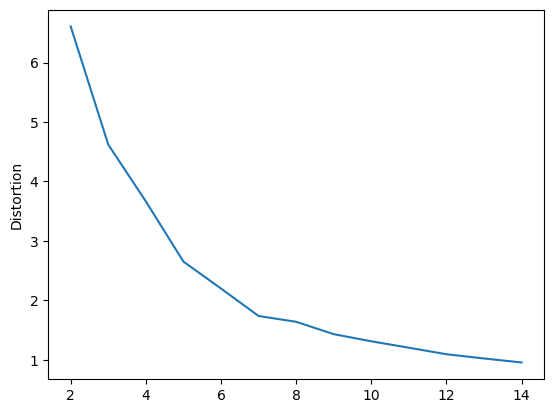

In [6]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_excel("customer master.xlsx")  
features = data[['Longitude', 'Latitude']] 
distortions = []  
K=range(2,15)
for k in range(2,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    distortions.append(sum(np.min(cdist(features,kmeans.cluster_centers_,
'euclidean'),axis=1)) / features.shape[0]) 
plt.plot(list(range(2,15)), distortions)  
plt.ylabel('Distortion') 
plt.show()


Với khoảng K là từ 2 đến 15 ta nhận thấy tại điểm K=7 chính là điểm khủy tay (elbow point). Kể từ sau điểm này ta thấy biến dạng (distortion) giảm không đáng kể, do đó chọn K=7 để có thể phân cụm tối ưu với thuật toán K-mean.

## phân cụm bằng thuật toán K-mean:

Lựa chọn các features là Longitude và Latitude.

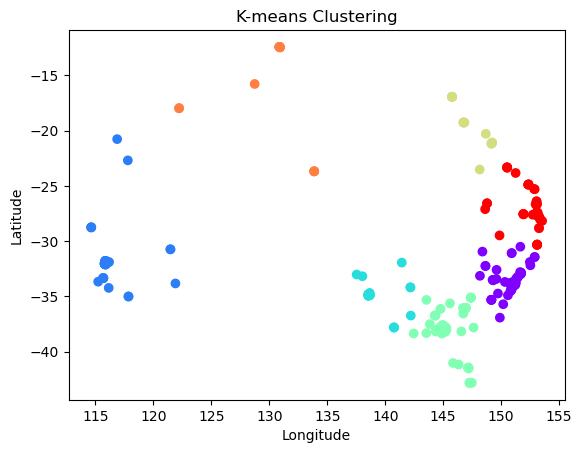

In [4]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt
# Đọc dữ liệu từ tệp Excel
data = pd.read_excel("customer master.xlsx")  
# Chọn các đặc trưng cho phân cụm
features = data[['Longitude', 'Latitude']]  
# Khởi tạo mô hình phân cụm K-means với số cụm cần tạo 
kmeans = KMeans(n_clusters=7)  
# Thực hiện phân cụm trên dữ liệu
kmeans.fit(features)
# Thêm kết quả phân cụm vào DataFrame gốc
data['Cluster'] = kmeans.labels_
selected_columns = data[['CustomerName', 'Cluster']]
#lưu kết quả vào file answer_task1.xlsx
df=pd.DataFrame(selected_columns)
file_name = 'answer_task1.xlsx'
df.to_excel(file_name, index=False)
#Trực quan dữ liệu 
plt.scatter(data['Longitude'], data['Latitude'],c=data['Cluster'],cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')
plt.show()


bảng phân cụm

In [7]:
df

,CustomerName,Cluster
0,Customer 48,3
1,Customer 50,3
2,Customer 51,0
3,Customer 52,6
4,Customer 53,3
...,...,...
309,Customer 639,6
310,Customer 640,6
311,Customer 650,3
312,Customer 855,3
